In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Store filepath in a variable
file_one = "Resources/DJIA.csv"
file_two = "Resources/NASDAQ100.csv"
file_three = "Resources/SP500.csv"
file_four = "Resources/HPI_master.csv"
#file five is the already processed csv
file_five = "Resources/HPI/US_HPI_pct.csv"

In [3]:
#This function allows us to plot a single line with just slope and intercept. This function does not exist by itself in matplotlib.
def plotline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [4]:
from os import listdir
from os.path import isfile, join
mypath="Resources/HPI/"
HPI_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

HPI_dfs = []
for filename in HPI_files:
    HPI_dfs.append(pd.read_csv(mypath+filename))

In [5]:
# Read our Data files with the pandas library and create DF
DJIA_df = pd.read_csv(file_one)

# Separate out the month and year cols
DJIA_df['year'] = pd.DatetimeIndex(DJIA_df['DATE']).year
DJIA_df['month'] = pd.DatetimeIndex(DJIA_df['DATE']).month

# Filter everything before 2009 out (Which just happens to be the year here)
DJIA_df = DJIA_df[DJIA_df.year >= 2009]
# We also need to filter the other end of the data because stock data ends at Jan 2019, HPI data ends at March 2019. It's easy to just filter by year so we can lose the months.
#Trying to filter out just the last two months may be harder but would give us Jan 2019 data when plotting.
DJIA_df = DJIA_df[DJIA_df.year <= 2018]


#Drop junk rows with VALUE of "."
DJIA_df.drop(DJIA_df[DJIA_df.VALUE == "."].index, inplace=True)

#Convert the rest to floats
DJIA_df['VALUE'] = DJIA_df['VALUE'].astype(float)

#Group by Year, Month and average the 30 days
DJIA_df_mean = DJIA_df.groupby(['year','month'])['VALUE'].mean().pct_change()

DJIA_df_mean = DJIA_df_mean * 100


In [6]:
NAS_df = pd.read_csv(file_two)

NAS_df['year'] = pd.DatetimeIndex(NAS_df['DATE']).year
NAS_df['month'] = pd.DatetimeIndex(NAS_df['DATE']).month

NAS_df = NAS_df[NAS_df.year >= 2009]
NAS_df = NAS_df[NAS_df.year <= 2018]

NAS_df.drop(NAS_df[NAS_df.VALUE == "."].index, inplace=True)

NAS_df['VALUE'] = NAS_df['VALUE'].astype(float)

NAS_df_mean = NAS_df.groupby(['year','month'])['VALUE'].mean().pct_change()

NAS_df_mean = NAS_df_mean * 100

In [7]:
SP500_df = pd.read_csv(file_three)

SP500_df['year'] = pd.DatetimeIndex(SP500_df['DATE']).year
SP500_df['month'] = pd.DatetimeIndex(SP500_df['DATE']).month

SP500_df = SP500_df[SP500_df.year >= 2009]
SP500_df = SP500_df[SP500_df.year <= 2018]

SP500_df.drop(SP500_df[SP500_df.VALUE == "."].index, inplace=True)

SP500_df['VALUE'] = SP500_df['VALUE'].astype(float)

SP500_df_mean = SP500_df.groupby(['year','month'])['VALUE'].mean().pct_change()

SP500_df_mean = SP500_df_mean * 100

Regarding index_sa vs index_nsa

Q: For those HPIs that are seasonally adjusted, what approach is used in performing the seasonal adjustment?

A: The Census Bureau's X-12 ARIMA procedure is used, as implemented in the SAS software package. The automated ARIMA model-selection algorithm in X-12 is employed, which searches through a series of seasonality structures and selects the first that satisfies the Ljung-Box test for serial correlation.

In [8]:
HPI_df = pd.read_csv(file_five)
HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month", "Pct_change":"VALUE"})

HPI_df = HPI_df[HPI_df.year >= 2009]
HPI_df = HPI_df[HPI_df.year <= 2018]

#Converting to add a date-time object
HPI_df["day"] = 1
HPI_df["Date"] = pd.to_datetime(HPI_df[["year", "month", "day"]])

HPI_y = HPI_df["VALUE"]
HPI_y = HPI_y.rename("HPI")

#This x_axis shoudl work for all plots now.
x_axis = HPI_df["Date"]

In [9]:
#In order to plot the date, we need a column of "datetime" object and our current columns don't work

#Removes the grouped-by index and turns them into columns, resetting index into 0's 
DJIA_reorganized = DJIA_df_mean.reset_index()

#datetime requires a day. We don't have a day specified so we'll just assign it to the first of every month.
DJIA_reorganized["day"] = 1

#we create a new column "Date" to house the new datetime object.
DJIA_reorganized["Date"] = pd.to_datetime(DJIA_reorganized[["year", "month", "day"]])


#This x_axis shoudl work for all plots now.
x_axis = DJIA_reorganized["Date"]

#And we create the Y axis from the values of SP500.
# DJIA_y = DJIA_reorganized["VALUE"].rolling(6).mean()
DJIA_y = DJIA_reorganized["VALUE"]
DJIA_y = DJIA_y.rename('DJIA')

In [10]:
NAS_reorganized = NAS_df_mean.reset_index()

NAS_reorganized["day"] = 1

NAS_reorganized["Date"] = pd.to_datetime(NAS_reorganized[["year", "month", "day"]])

x_axis = NAS_reorganized["Date"]

# NAS_y = NAS_reorganized["VALUE"].rolling(6).mean()
NAS_y = NAS_reorganized["VALUE"]

NAS_y = NAS_y.rename('NAS')


In [11]:
SP500_reorganized = SP500_df_mean.reset_index()

SP500_reorganized["day"] = 1

SP500_reorganized["Date"] = pd.to_datetime(SP500_reorganized[["year", "month", "day"]])

x_axis = SP500_reorganized["Date"]

# SP500_y = SP500_reorganized["VALUE"].rolling(6).mean()
SP500_y = SP500_reorganized["VALUE"]

SP500_y = SP500_y.rename('SP500')

/Users/minglei/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


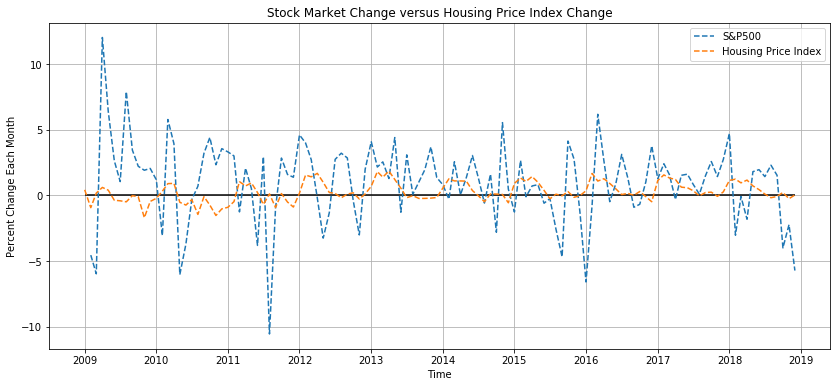

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

# plt.xkcd()
plt.grid(which="both")

#Put a horizontal line on the zero line
plt.hlines(0, x_axis[0], x_axis[len(x_axis)-1], colors='black', linestyles="-")


sp500_hand, = ax.plot_date(x_axis, SP500_y,linewidth=1.5, linestyle="--", marker="", label="S&P500")

hpi_hand, = ax.plot_date(x_axis, HPI_y,linewidth=1.5, linestyle="--", marker="", label="Housing Price Index")

plt.xlabel("Time")
plt.ylabel("Percent Change Each Month")
plt.title("Stock Market Change versus Housing Price Index Change")
plt.legend(handles=[sp500_hand, hpi_hand], loc="best")

plt.savefig("Pictures/" + "Stock Market vs HPI")

In [13]:
slopes = []
intercepts = []
regions = []
#Creating a generalized plot function for stockmaret vs HPI plotting
def plotter(x, y, region_name):
    #Making the plot/figure canvas object
    fig, ax = plt.subplots(figsize=(14,6))

    #plot the points
    ax.plot(x, y, linewidth=0, marker="o")

    # getting the line. BE SURE TO REMOVE NANs in the DF by changing .tail(X)
    # -X means remove X amount of rows from the top
    (slope, intercept, _, _, _) = linregress(x.tail(-1), y.tail(-1))
    # plot the regression line
    plotline(slope, intercept)
    
    #save the info into our regression summary for later
    slopes.append(slope)
    intercepts.append(intercept)

    plt.title(region_name + " Housing Price Index vs Stock Market (% Change)")
    plt.xlabel("Stock Market % Change")
    
    plt.savefig("Pictures/" + region_name)
    


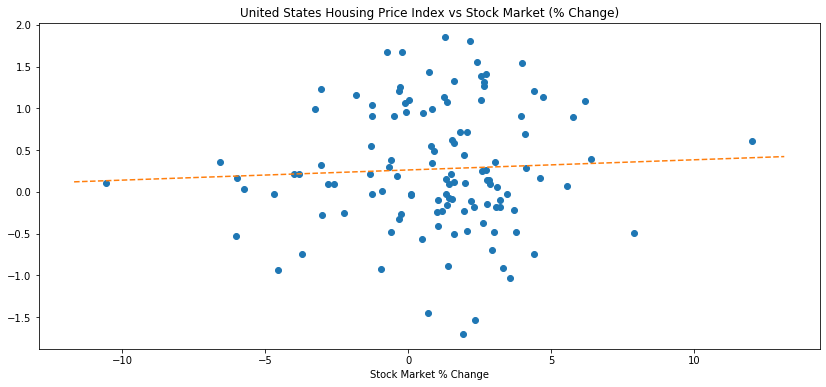

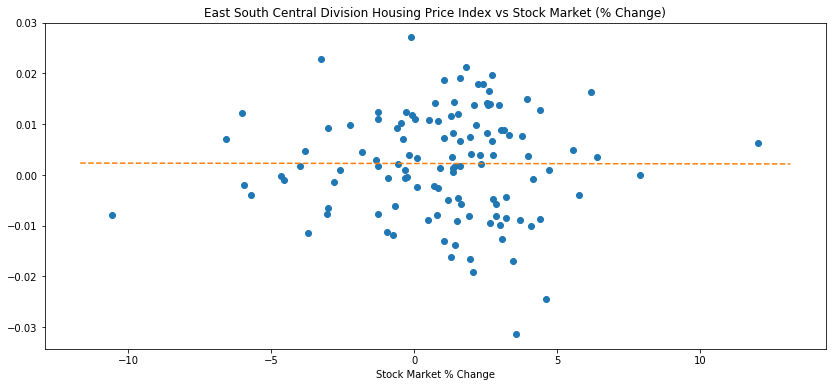

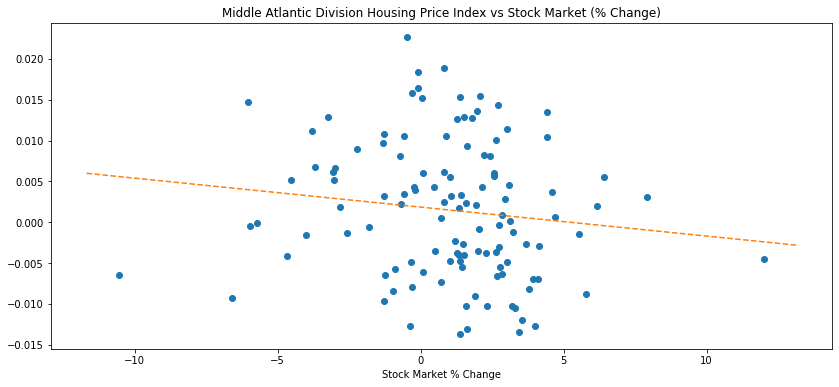

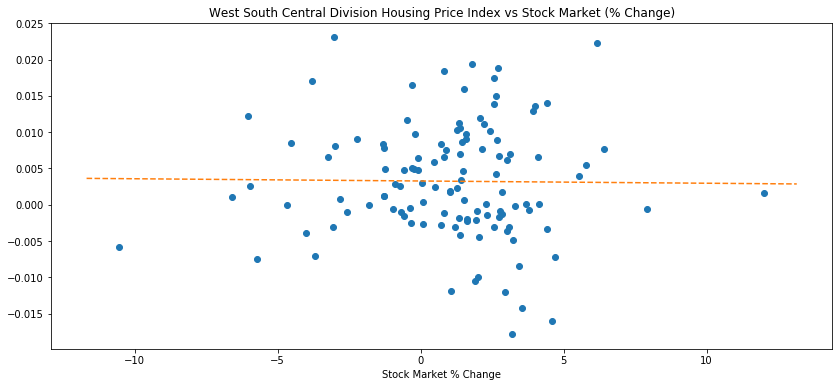

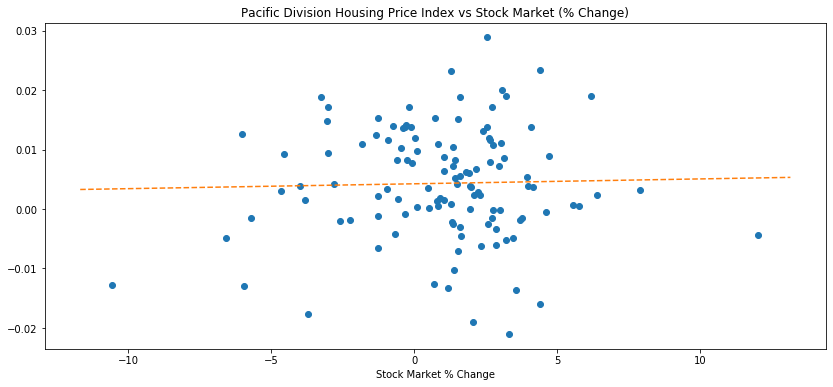

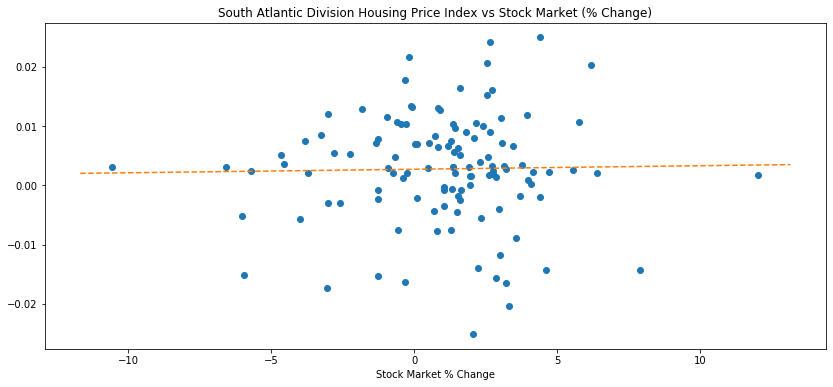

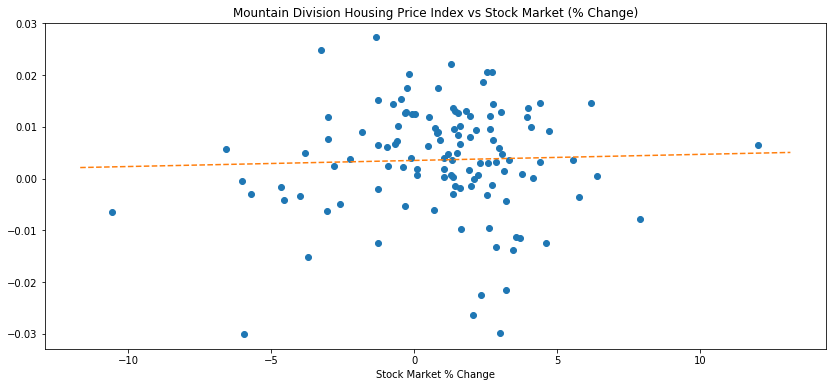

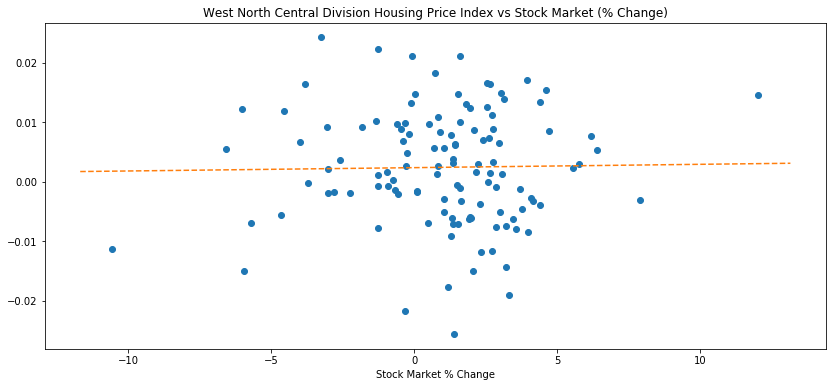

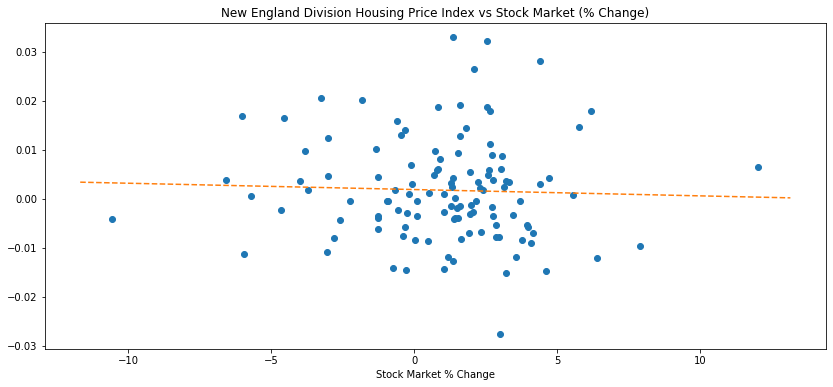

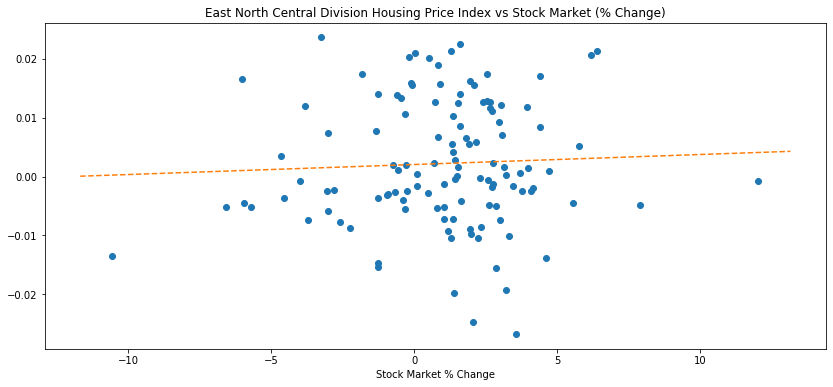

In [14]:
#making a stock vs HPI plot for all HPIs
for i in range(len(HPI_dfs)):
    HPI_df = HPI_dfs[i]
    #Cleaning the HPI df further
    HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month", "Pct_change":"VALUE"})
    
    #Remove extra months
    HPI_df = HPI_df[HPI_df.year >= 2009]
    HPI_df = HPI_df[HPI_df.year <= 2018]

    #Converting to add a date-time object
    HPI_df["day"] = 1
    HPI_df["Date"] = pd.to_datetime(HPI_df[["year", "month", "day"]])
    HPI_y = HPI_df["VALUE"]
    HPI_y = HPI_y.rename("HPI")
    
    #Get the name of the region
    region_name = HPI_df.iloc[0,2]
    
    #add it to our linear regression summary
    regions.append(region_name)
    
    #This x_axis should work for all plots now.
    x_axis = HPI_df["Date"]
    
    plotter(SP500_y, HPI_y, region_name)
    


In [15]:
# plt.xkcd(scale=100, length=1000, randomness=4)
# fig, ax = plt.subplots(figsize=(14,6))
# ax.plot(SP500_y, HPI_y)

# plt.savefig("Pictures/Basic Summary")

In [16]:
# plt.xkcd(scale=100, length=100, randomness=4)
# fig, ax = plt.subplots(figsize=(14,6))
# ax.plot(SP500_y, HPI_y)

# plt.savefig("Pictures/Basic Summary 2")

In [17]:
#Making a dataframe for the regions
lin_reg = pd.DataFrame({"Region":regions, "Slope": slopes, "Y Intercept": intercepts})
lin_reg

,Region,Slope,Y Intercept
0,United States,0.012187,0.262114
1,East South Central Division,-0.000007,0.002264
2,Middle Atlantic Division,-0.000355,0.001846
3,West South Central Division,-0.000031,0.003267
4,Pacific Division,0.000082,0.004243
5,South Atlantic Division,0.000060,0.002706
6,Mountain Division,0.000118,0.003504
7,West North Central Division,0.000056,0.002367
8,New England Division,-0.000129,0.001881
9,East North Central Division,0.000170,0.002036


In [18]:
lin_reg.to_csv("Regions and their line formulas.csv", index=False)

In [19]:
#If we had more time, I'd like to plot the linear regression slopes on to a heat map to show the correlations between rising stock market prices and rising HPI prices.


# #Repasting code down here to work on it closer to me eyes. Don't do this at home. Terrible practice.
# HPI_df = pd.read_csv(file_four)
# HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month", "Pct_change":"VALUE"})

# HPI_df = HPI_df[HPI_df.year >= 2009]
# HPI_df = HPI_df[HPI_df.year <= 2018]
# HPI_df = HPI_df[HPI_df.frequency == "quarterly"]
# #Converting to add a date-time object
# HPI_df["day"] = 1
# HPI_df["Date"] = pd.to_datetime(HPI_df[["year", "month", "day"]])
# HPI_df.place_name.value_counts()

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap
# from matplotlib.colors import rgb2hex
# from matplotlib.patches import Polygon
# # Lambert Conformal map of lower 48 states.
# m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
#         projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# shp_info = m.readshapefile('Resources/st99_d00','states',drawbounds=True)
# popdensity = {
    
# #Northeast
# 'New Jersey':  438.00,
# 'Rhode Island':   387.35,
# 'Massachusetts':   312.68,
# 'Connecticut':    271.40,
# 'Maryland':   209.23,
# 'New York':    155.18,
# 'Delaware':    154.87,
# 'Florida':     114.43,
# 'Ohio':  107.05,
# 'Pennsylvania':  105.80,
# 'Illinois':    86.27,
# 'California':  83.85,
# 'Hawaii':  72.83,
# 'Virginia':    69.03,
# 'Michigan':    67.55,
# 'Indiana':    65.46,
# 'North Carolina':  63.80,
# 'Georgia':     54.59,
# 'Tennessee':   53.29,
# 'New Hampshire':   53.20,
# 'South Carolina':  51.45,
# 'Louisiana':   39.61,
# 'Kentucky':   39.28,
# 'Wisconsin':  38.13,
# 'Washington':  34.20,
# 'Alabama':     33.84,
# 'Missouri':    31.36,
# 'Texas':   30.75,
# 'West Virginia':   29.00,
# 'Vermont':     25.41,
# 'Minnesota':  23.86,
# 'Mississippi':   23.42,
# 'Iowa':  20.22,
# 'Arkansas':    19.82,
# 'Oklahoma':    19.40,
# 'Arizona':     17.43,
# 'Colorado':    16.01,
# 'Maine':  15.95,
# 'Oregon':  13.76,
# 'Kansas':  12.69,
# 'Utah':  10.50,
# 'Nebraska':    8.60,
# 'Nevada':  7.03,
# 'Idaho':   6.04,
# 'New Mexico':  5.79,
# 'South Dakota':  3.84,
# 'North Dakota':  3.59,
# 'Montana':     2.39,
# 'Wyoming':      1.96,
# 'Alaska':     0.42}
# # choose a color for each state based on population density.
# colors={}
# statenames=[]
# cmap = plt.cm.hot # use 'hot' colormap
# vmin = 0; vmax = 450 # set range.
# for shapedict in m.states_info:
#     statename = shapedict['NAME']
#     # skip DC and Puerto Rico.
#     if statename not in ['District of Columbia','Puerto Rico']:
#         pop = popdensity[statename]
#         # calling colormap with value between 0 and 1 returns
#         # rgba value.  Invert color range (hot colors are high
#         # population), take sqrt root to spread out colors more.
#         colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
#     statenames.append(statename)
# # cycle through state names, color each one.
# ax = plt.gca() # get current axes instance
# for nshape,seg in enumerate(m.states):
#     # skip DC and Puerto Rico.
#     if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
#         color = rgb2hex(colors[statenames[nshape]]) 
#         poly = Polygon(seg,facecolor=color,edgecolor=color)
#         ax.add_patch(poly)
# plt.title('States by Stock Market Change vs Housing Price Index Change')
# plt.show()
